## ARIMA 모델을 이용한 유튜버 고기남자 성장률 예측

In [1]:
# 필요한 모듈 임포트
import pandas as pd
import matplotlib.pyplot as plt

### csv 파일을 읽어와서 데이터 프레임 생성

In [2]:
# 데이터 프레임화
df = pd.read_csv('data/고기남자_stat.csv')
df

,searchDate,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
0,2020-07-25,477204,198000,45,96,96
1,2020-07-26,950165,217000,46,96,95
2,2020-07-27,998858,234000,46,96,94
3,2020-07-28,572266,244000,46,96,94
4,2020-07-29,442587,250000,46,96,94
...,...,...,...,...,...,...
195,2021-02-05,237472,914000,65,97,91
196,2021-02-06,217344,915000,65,97,91
197,2021-02-07,213673,917000,65,97,91
198,2021-02-08,241379,918000,65,97,91


In [3]:
# 날짜 데이터를 데이터 형식으로 변환(딱히 의미는 없음)
df['searchDate'] = pd.to_datetime(df.searchDate, format='%Y-%m-%d')

In [4]:
# 날짜 열을 인덱스로 설정
df.set_index('searchDate', inplace=True)
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-07-25,477204,198000,45,96,96
2020-07-26,950165,217000,46,96,95
2020-07-27,998858,234000,46,96,94
2020-07-28,572266,244000,46,96,94
2020-07-29,442587,250000,46,96,94
...,...,...,...,...,...
2021-02-05,237472,914000,65,97,91
2021-02-06,217344,915000,65,97,91
2021-02-07,213673,917000,65,97,91


In [5]:
# 데이터가 없는 첫 행을 삭제
# df = df.drop(0)
df

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
searchDate,,,,,
2020-07-25,477204,198000,45,96,96
2020-07-26,950165,217000,46,96,95
2020-07-27,998858,234000,46,96,94
2020-07-28,572266,244000,46,96,94
2020-07-29,442587,250000,46,96,94
...,...,...,...,...,...
2021-02-05,237472,914000,65,97,91
2021-02-06,217344,915000,65,97,91
2021-02-07,213673,917000,65,97,91


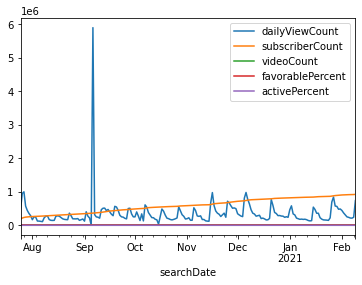

In [6]:
df.plot()
plt.show()

In [7]:
df.describe()

,dailyViewCount,subscriberCount,videoCount,favorablePercent,activePercent
count,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,3.534632e+05,590440.000000,56.635000,96.915000,90.940000
std,4.353820e+05,210140.767369,5.777427,0.297012,2.077977
min,0.000000e+00,198000.000000,45.000000,95.000000,77.000000
25%,1.923682e+05,401750.000000,52.000000,97.000000,90.000000
50%,2.725870e+05,587000.000000,57.000000,97.000000,91.000000
75%,4.370948e+05,792750.000000,62.000000,97.000000,92.000000
max,5.894180e+06,923000.000000,66.000000,97.000000,96.000000


In [8]:
# 예측할 기간을 정함
predict_len = 30

In [9]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# 예측할 기한을 기준으로 train 데이터와 test 데이터를 분리(슬라이싱)함
train_df = df[:len(df)-predict_len]
test_df = df[len(df)-predict_len:]

# ARIMA 모델 선언
# 모델에 사용하는 값은 train 데이터의 구독자 수(subscriberCount) 데이터
model = ARIMA(train_df.subscriberCount.values, order=(2, 1, 2))
# 모델 학습
model_fit = model.fit(trend='c', full_output=True, disp=True)
print(model_fit.summary())

C:\Users\shb20\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  169
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1498.974
Method:                       css-mle   S.D. of innovations           1714.276
Date:                Wed, 10 Feb 2021   AIC                           3009.949
Time:                        10:50:42   BIC                           3028.728
Sample:                             1   HQIC                          3017.570
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3910.7216    513.258      7.619      0.000    2904.754    4916.689
ar.L1.D.y     -0.1281      0.172     -0.747      0.455      -0.464       0.208
ar.L2.D.y      0.4513      0.148      3.041      0.0

C:\Users\shb20\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


<AxesSubplot:>

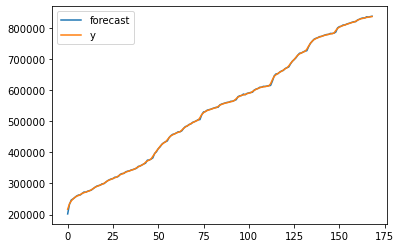

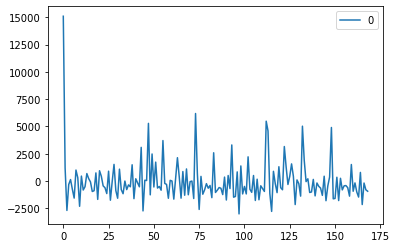

In [10]:
fig = model_fit.plot_predict()
res = pd.DataFrame(model_fit.resid)
res.plot()

In [11]:
# 설정한 기간만큼의 값을 예측함
# steps = 예측할 기간의 길이
forecast_data = model_fit.forecast(steps=predict_len)

# 마지막 5일의 예측 데이터
pred_y = forecast_data[0].tolist()
# 최소 예측값(하한선)을 저장할 리스트
pred_y_lower = []
# 최대 예측값(상한선)을 저장할 리스트
pred_y_upper = []

# 각 리스트에 값을 추가
for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

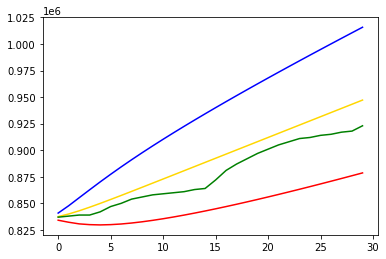

In [12]:
# 예측 값
plt.plot(pred_y, color='gold')
# 예측 최소 값
plt.plot(pred_y_lower, color='red')
# 예측 최대 값
plt.plot(pred_y_upper, color='blue')
# 실제 값
plt.plot(test_df.subscriberCount.values, color='green')